In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\EDA\Files\zomato.csv',encoding='latin-1')
df.head

<bound method NDFrame.head of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul  

In [3]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul

In [5]:
df.describe


<bound method NDFrame.describe of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanb

In [6]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                           

In [ ]:
# We want-
# 1)Missing Values
# 2)Explore about the numerical Variables
# 3)Explore the categorical Variables
# 4)Finding realations between values


In [7]:
#Missing Values
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot: >

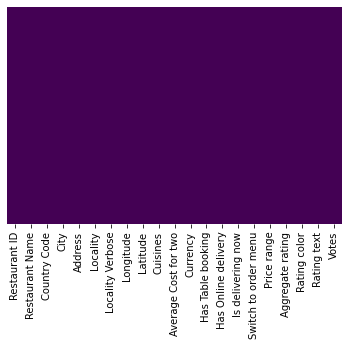

In [13]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = 'viridis')

In [16]:
df_country = pd.read_excel(r'D:\EDA\Files\Country-Code.xlsx')

In [17]:
df_country.head

<bound method NDFrame.head of     Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States>

In [21]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [24]:
#merging two data sets
final_df = pd.merge(df,df_country,on = 'Country Code',how='left')

In [25]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [26]:
##to check data types
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [29]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [31]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [33]:
country_names = final_df.Country.value_counts().index

In [34]:
country_values = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x22c4cce3280>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

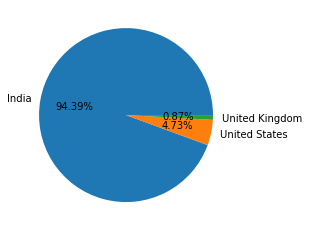

In [37]:
##Pie Chart - top 3 countries
plt.pie(country_values[:3],labels=country_names[:3],autopct= '%1.2f%%')

In [38]:
#Observation 
# Maximum records are from India Followed by USA and UK

In [ ]:
##Numerical Variables   